In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 603


In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
queryURL = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    #time.sleep(1)
    #print(city) 
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
     
        #city_url = url + "appid=" + weather_api_key + "&q=" + city
    city_url = f"{queryURL}{city}"
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
        
       
    # Run an API request for each of the cities
        
        #print(response)#['weather'])#[0]['description'])
    #print(requests.get(city_url).json())
    try:
        
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        print(response)
        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
       
        print("city_found")
   # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 2 of Set 1 | mehamn
{'coord': {'lon': 27.8492, 'lat': 71.0357}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': -10.03, 'feels_like': -17.03, 'temp_min': -10.03, 'temp_max': -9.05, 'pressure': 996, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 160}, 'clouds': {'all': 36}, 'dt': 1678106192, 'sys': {'type': 1, 'id': 1633, 'country': 'NO', 'sunrise': 1678079904, 'sunset': 1678116112}, 'timezone': 3600, 'id': 778707, 'name': 'Mehamn', 'cod': 200}
city_found
Processing Record 3 of Set 1 | port alfred
{'coord': {'lon': 26.891, 'lat': -33.5906}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 23.99, 'feels_like': 24.56, 

{'coord': {'lon': 19.2345, 'lat': -34.4187}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 21, 'feels_like': 21.14, 'temp_min': 21, 'temp_max': 21, 'pressure': 1019, 'humidity': 76, 'sea_level': 1019, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 6.15, 'deg': 134, 'gust': 7.75}, 'rain': {'1h': 0.16}, 'clouds': {'all': 100}, 'dt': 1678106144, 'sys': {'type': 2, 'id': 2006131, 'country': 'ZA', 'sunrise': 1678077273, 'sunset': 1678122877}, 'timezone': 7200, 'id': 3366880, 'name': 'Hermanus', 'cod': 200}
city_found
Processing Record 19 of Set 1 | lincoln
{'coord': {'lon': -96.667, 'lat': 40.8}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.78, 'feels_like': -3.86, 'temp_min': 0.56, 'temp_max': 2.29, 'pressure': 1014, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 7.6, 'deg': 338, 'gust': 9.83}, 'clouds': {'

{'coord': {'lon': -175.2, 'lat': -21.2}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 25.09, 'feels_like': 25.95, 'temp_min': 25.09, 'temp_max': 25.09, 'pressure': 1008, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 250}, 'rain': {'1h': 0.2}, 'clouds': {'all': 75}, 'dt': 1678106714, 'sys': {'type': 1, 'id': 7285, 'country': 'TO', 'sunrise': 1678210816, 'sunset': 1678255418}, 'timezone': 46800, 'id': 4032243, 'name': 'Vaini', 'cod': 200}
city_found
Processing Record 35 of Set 1 | upernavik
{'coord': {'lon': -56.1549, 'lat': 72.7868}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': -6.71, 'feels_like': -10.19, 'temp_min': -6.71, 'temp_max': -6.71, 'pressure': 1035, 'humidity': 84, 'sea_level': 1035, 'grnd_level': 1035}, 'visibility': 10000, 'wind': {'speed': 1.95, 'deg': 133, 'gust': 1.97}, 'clouds': {'all'

{'coord': {'lon': -78.8333, 'lat': -2.2}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 10.22, 'feels_like': 9.75, 'temp_min': 10.22, 'temp_max': 10.22, 'pressure': 1019, 'humidity': 94, 'sea_level': 1019, 'grnd_level': 722}, 'visibility': 6393, 'wind': {'speed': 0.75, 'deg': 154, 'gust': 1.49}, 'rain': {'1h': 2.39}, 'clouds': {'all': 100}, 'dt': 1678106481, 'sys': {'country': 'EC', 'sunrise': 1678101755, 'sunset': 1678145461}, 'timezone': -18000, 'id': 3660798, 'name': 'Alausí', 'cod': 200}
city_found
Processing Record 0 of Set 2 | qaanaaq
{'coord': {'lon': -69.3632, 'lat': 77.484}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -6.99, 'feels_like': -6.99, 'temp_min': -6.99, 'temp_max': -6.99, 'pressure': 1035, 'humidity': 95, 'sea_level': 1035, 'grnd_level': 1031}, 'visibility': 1526, 'wind': {'speed': 0.85, 'deg': 279, 'gu

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 15 of Set 2 | bambous virieux
{'coord': {'lon': 57.7575, 'lat': -20.3428}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 28.14, 'feels_like': 32.13, 'temp_min': 25.12, 'temp_max': 28.14, 'pressure': 1009, 'humidity': 78}, 'visibility': 8000, 'wind': {'speed': 3.09, 'deg': 120}, 'rain': {'1h': 0.87}, 'clouds': {'all': 75}, 'dt': 1678106157, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1678068495, 'sunset': 1678113167}, 'timezone': 14400, 'id': 1106677, 'name': 'Bambous Virieux', 'cod': 200}
city_found
Processing Record 16 of Set 2 | mallaig
{'coord': {'lon': -111.3685, 'lat': 54.2169}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -19.84, 'feels_like': -26.14, 'temp_min': -21.12, 'temp_max': -19.84, 'pressure': 1039, 'humidity

{'coord': {'lon': -159.319, 'lat': 22.0752}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 19.78, 'feels_like': 20.24, 'temp_min': 18.99, 'temp_max': 21.99, 'pressure': 1009, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 230}, 'rain': {'1h': 0.85}, 'clouds': {'all': 100}, 'dt': 1678106728, 'sys': {'type': 2, 'id': 2005473, 'country': 'US', 'sunrise': 1678121653, 'sunset': 1678164189}, 'timezone': -36000, 'id': 5848280, 'name': 'Kapaa', 'cod': 200}
city_found
Processing Record 32 of Set 2 | bluff
{'coord': {'lon': 168.3333, 'lat': -46.6}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 12.44, 'feels_like': 11.85, 'temp_min': 12.44, 'temp_max': 12.44, 'pressure': 1014, 'humidity': 81, 'sea_level': 1014, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 0.46, 'deg': 53, 'gust': 2.85}, 'clouds': {'all': 17

{'coord': {'lon': 124.7333, 'lat': 52.3333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -10.94, 'feels_like': -14.16, 'temp_min': -10.94, 'temp_max': -10.94, 'pressure': 1017, 'humidity': 90, 'sea_level': 1017, 'grnd_level': 962}, 'visibility': 10000, 'wind': {'speed': 1.47, 'deg': 268, 'gust': 1.52}, 'clouds': {'all': 97}, 'dt': 1678106497, 'sys': {'country': 'CN', 'sunrise': 1678054681, 'sunset': 1678094838}, 'timezone': 28800, 'id': 2034615, 'name': 'Tahe', 'cod': 200}
city_found
Processing Record 49 of Set 2 | kuito
{'coord': {'lon': 16.9333, 'lat': -12.3833}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 23.59, 'feels_like': 23.75, 'temp_min': 23.59, 'temp_max': 23.59, 'pressure': 1010, 'humidity': 67, 'sea_level': 1010, 'grnd_level': 832}, 'visibility': 7765, 'wind': {'speed': 2.33, 'deg': 130, 'gust': 2.82}, 'rain': {

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 15 of Set 3 | cape town
{'coord': {'lon': 18.4232, 'lat': -33.9258}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 22.41, 'feels_like': 22.33, 'temp_min': 21.06, 'temp_max': 25.06, 'pressure': 1019, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 170}, 'clouds': {'all': 20}, 'dt': 1678106458, 'sys': {'type': 2, 'id': 2073005, 'country': 'ZA', 'sunrise': 1678077487, 'sunset': 1678123053}, 'timezone': 7200, 'id': 3369157, 'name': 'Cape Town', 'cod': 200}
city_found
Processing Record 16 of Set 3 | markova
{'coord': {'lon': 24.4138, 'lat': 48.6758}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 3.43, 'feels_like': -0.39, 'temp_min': 3.43, 'temp_max': 3.43, 'pressure': 1008, 'humidity': 52, 'sea_level': 1008, 'grnd_level

{'coord': {'lon': 55.2, 'lat': 45.3167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 15.48, 'feels_like': 14.42, 'temp_min': 15.48, 'temp_max': 15.48, 'pressure': 1002, 'humidity': 51, 'sea_level': 1002, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 7.05, 'deg': 135, 'gust': 11.1}, 'clouds': {'all': 100}, 'dt': 1678106480, 'sys': {'country': 'KZ', 'sunrise': 1678070984, 'sunset': 1678111906}, 'timezone': 18000, 'id': 610298, 'name': 'Beyneu', 'cod': 200}
city_found
Processing Record 31 of Set 3 | dikson
{'coord': {'lon': 80.5464, 'lat': 73.5069}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -22.55, 'feels_like': -29.55, 'temp_min': -22.55, 'temp_max': -22.55, 'pressure': 1007, 'humidity': 97, 'sea_level': 1007, 'grnd_level': 1001}, 'visibility': 1223, 'wind': {'speed': 3.45, 'deg': 62, 'gust': 3.69}, 'cl

{'coord': {'lon': -114.3525, 'lat': 62.456}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -32.71, 'feels_like': -39.71, 'temp_min': -32.71, 'temp_max': -32.71, 'pressure': 1035, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 120}, 'clouds': {'all': 0}, 'dt': 1678106511, 'sys': {'type': 1, 'id': 1007, 'country': 'CA', 'sunrise': 1678112720, 'sunset': 1678151541}, 'timezone': -25200, 'id': 6185377, 'name': 'Yellowknife', 'cod': 200}
city_found
Processing Record 45 of Set 3 | tabou
{'coord': {'lon': -7.3528, 'lat': 4.423}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.25, 'feels_like': 34.91, 'temp_min': 30.25, 'temp_max': 30.25, 'pressure': 1010, 'humidity': 67, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.18, 'deg': 219, 'gust': 3.41}, 'clouds': {'all': 76}, 'dt': 16781

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 10 of Set 4 | brive-la-gaillarde
{'coord': {'lon': 1.5, 'lat': 45.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 7.38, 'feels_like': 6.15, 'temp_min': 7.38, 'temp_max': 7.38, 'pressure': 1010, 'humidity': 46, 'sea_level': 1010, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 253, 'gust': 3}, 'clouds': {'all': 6}, 'dt': 1678106516, 'sys': {'type': 2, 'id': 2009056, 'country': 'FR', 'sunrise': 1678083853, 'sunset': 1678124809}, 'timezone': 3600, 'id': 3029973, 'name': 'Arrondissement de Brive-la-Gaillarde', 'cod': 200}
city_found
Processing Record 11 of Set 4 | dosso
{'coord': {'lon': 3.1937, 'lat': 13.049}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 40.84, 'feels_like': 37.12, 'temp_min': 40.84, 'temp_max': 40.84, 'p

{'coord': {'lon': 27.9116, 'lat': -33.0153}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 26.52, 'feels_like': 26.52, 'temp_min': 26.52, 'temp_max': 26.52, 'pressure': 1014, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 7.72, 'deg': 220}, 'clouds': {'all': 0}, 'dt': 1678106175, 'sys': {'type': 1, 'id': 1912, 'country': 'ZA', 'sunrise': 1678075243, 'sunset': 1678120743}, 'timezone': 7200, 'id': 1006984, 'name': 'East London', 'cod': 200}
city_found
Processing Record 27 of Set 4 | ixtapa
{'coord': {'lon': -105.2, 'lat': 20.7}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 15.57, 'feels_like': 15.64, 'temp_min': 15.57, 'temp_max': 17.9, 'pressure': 1014, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 40}, 'dt': 1678106298, 'sys': {'type': 1, 'id': 7156, 'country': 'MX', 'sunrise

{'coord': {'lon': -72.225, 'lat': 7.7669}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19.74, 'feels_like': 19.6, 'temp_min': 19.74, 'temp_max': 20.1, 'pressure': 1015, 'humidity': 70, 'sea_level': 1015, 'grnd_level': 915}, 'visibility': 10000, 'wind': {'speed': 1.71, 'deg': 159, 'gust': 3.74}, 'clouds': {'all': 100}, 'dt': 1678106119, 'sys': {'type': 1, 'id': 8741, 'country': 'VE', 'sunrise': 1678100407, 'sunset': 1678143637}, 'timezone': -14400, 'id': 3628473, 'name': 'San Cristobal', 'cod': 200}
city_found
Processing Record 44 of Set 4 | novoorsk
{'coord': {'lon': 58.9813, 'lat': 51.381}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 1.36, 'feels_like': -1.21, 'temp_min': 0.89, 'temp_max': 1.36, 'pressure': 1012, 'humidity': 94, 'sea_level': 1012, 'grnd_level': 985}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 

{'coord': {'lon': 59.8118, 'lat': 58.6293}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': -4.74, 'feels_like': -7.31, 'temp_min': -4.74, 'temp_max': -4.74, 'pressure': 999, 'humidity': 94, 'sea_level': 999, 'grnd_level': 974}, 'visibility': 1135, 'wind': {'speed': 1.58, 'deg': 348, 'gust': 4.51}, 'snow': {'1h': 0.24}, 'clouds': {'all': 100}, 'dt': 1678106534, 'sys': {'country': 'RU', 'sunrise': 1678070670, 'sunset': 1678110007}, 'timezone': 18000, 'id': 520204, 'name': 'Nizhnyaya Tura', 'cod': 200}
city_found
Processing Record 8 of Set 5 | aklavik
{'coord': {'lon': -135.0107, 'lat': 68.2191}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -32.9, 'feels_like': -39.9, 'temp_min': -32.9, 'temp_max': -32.9, 'pressure': 1032, 'humidity': 99, 'sea_level': 1032, 'grnd_level': 1031}, 'visibility': 10000, 'wind': {'speed': 2.52, 'deg': 156, 'gu

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 23 of Set 5 | santa maria
{'coord': {'lon': -53.8069, 'lat': -29.6842}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 20.61, 'feels_like': 21.34, 'temp_min': 20.61, 'temp_max': 20.61, 'pressure': 1013, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 120}, 'clouds': {'all': 100}, 'dt': 1678106302, 'sys': {'type': 1, 'id': 8430, 'country': 'BR', 'sunrise': 1678094985, 'sunset': 1678140220}, 'timezone': -10800, 'id': 3450083, 'name': 'Santa Maria', 'cod': 200}
city_found
Processing Record 24 of Set 5 | jianhu
{'coord': {'lon': 120.5712, 'lat': 29.9799}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 16.97, 'feels_like': 15.95, 'temp_min': 16.97, 'temp_max': 16.97, 'pressure': 1021, 'humidity': 47, 'sea_level': 1021, 'gr

{'coord': {'lon': 24.6622, 'lat': 70.9963}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': -5.87, 'feels_like': -12.87, 'temp_min': -5.87, 'temp_max': -5.87, 'pressure': 995, 'humidity': 79, 'sea_level': 995, 'grnd_level': 994}, 'visibility': 3583, 'wind': {'speed': 11.12, 'deg': 37, 'gust': 10.83}, 'snow': {'1h': 0.55}, 'clouds': {'all': 100}, 'dt': 1678106267, 'sys': {'type': 1, 'id': 1638, 'country': 'NO', 'sunrise': 1678080658, 'sunset': 1678116888}, 'timezone': 3600, 'id': 779622, 'name': 'Havøysund', 'cod': 200}
city_found
Processing Record 38 of Set 5 | mar del plata
{'coord': {'lon': -57.5575, 'lat': -38.0023}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 27.19, 'feels_like': 29.27, 'temp_min': 25.01, 'temp_max': 27.19, 'pressure': 1012, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 360}, 'clouds': {'all': 0},

{'coord': {'lon': -114.0611, 'lat': 27.9769}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 12.91, 'feels_like': 12.21, 'temp_min': 12.91, 'temp_max': 12.91, 'pressure': 1018, 'humidity': 75, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 7.3, 'deg': 322, 'gust': 10.31}, 'clouds': {'all': 100}, 'dt': 1678106215, 'sys': {'country': 'MX', 'sunrise': 1678110958, 'sunset': 1678153163}, 'timezone': -25200, 'id': 4021858, 'name': 'Guerrero Negro', 'cod': 200}
city_found
Processing Record 3 of Set 6 | kristiansund
{'coord': {'lon': 7.732, 'lat': 63.1115}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': -0.64, 'feels_like': -0.64, 'temp_min': -0.97, 'temp_max': -0.64, 'pressure': 1000, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 0}, 'snow': {'1h': 0.18}, 'clouds': {'all': 75}, 'dt'

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 18 of Set 6 | suratgarh
{'coord': {'lon': 73.9, 'lat': 29.3167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.02, 'feels_like': 26.76, 'temp_min': 28.02, 'temp_max': 28.02, 'pressure': 1012, 'humidity': 20, 'sea_level': 1012, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 4.03, 'deg': 248, 'gust': 5.41}, 'clouds': {'all': 70}, 'dt': 1678106777, 'sys': {'country': 'IN', 'sunrise': 1678065921, 'sunset': 1678107994}, 'timezone': 19800, 'id': 1255361, 'name': 'Suratgarh', 'cod': 200}
city_found
Processing Record 19 of Set 6 | lavrentiya
{'coord': {'lon': -171, 'lat': 65.5833}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -0.01, 'feels_like': -2.53, 'temp_min': -0.01, 'temp_max': -0.01, 'pressure': 1007, 'humidity': 99, 'sea_level': 10

{'coord': {'lon': 20.0667, 'lat': 32.1167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 16.55, 'feels_like': 15.59, 'temp_min': 16.55, 'temp_max': 16.55, 'pressure': 1020, 'humidity': 51, 'sea_level': 1020, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 5.05, 'deg': 263, 'gust': 4.92}, 'clouds': {'all': 3}, 'dt': 1678106283, 'sys': {'country': 'LY', 'sunrise': 1678078917, 'sunset': 1678120834}, 'timezone': 7200, 'id': 88319, 'name': 'Benghazi', 'cod': 200}
city_found
Processing Record 35 of Set 6 | preobrazheniye
{'coord': {'lon': 133.9064, 'lat': 42.9019}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 1.4, 'feels_like': -1.51, 'temp_min': 1.4, 'temp_max': 1.4, 'pressure': 1014, 'humidity': 86, 'sea_level': 1014, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 2.65, 'deg': 281, 'gust': 3.39}, 'snow': {'1h': 

{'coord': {'lon': -9.0603, 'lat': 42.7762}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 14.42, 'feels_like': 13.98, 'temp_min': 13.8, 'temp_max': 15.38, 'pressure': 1011, 'humidity': 79, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 5.91, 'deg': 181, 'gust': 8.1}, 'clouds': {'all': 100}, 'dt': 1678106276, 'sys': {'type': 2, 'id': 72671, 'country': 'ES', 'sunrise': 1678086279, 'sunset': 1678127450}, 'timezone': 3600, 'id': 3115824, 'name': 'Muros', 'cod': 200}
city_found
Processing Record 0 of Set 7 | kiunga
{'coord': {'lon': 141.2906, 'lat': -6.1219}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.47, 'feels_like': 23.28, 'temp_min': 22.47, 'temp_max': 22.47, 'pressure': 1012, 'humidity': 96, 'sea_level': 1012, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 0.66, 'deg': 4

{'coord': {'lon': 118.7833, 'lat': 42.1167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 7.14, 'feels_like': 5.36, 'temp_min': 7.14, 'temp_max': 7.14, 'pressure': 1016, 'humidity': 25, 'sea_level': 1016, 'grnd_level': 935}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 195, 'gust': 2.49}, 'clouds': {'all': 0}, 'dt': 1678106573, 'sys': {'country': 'CN', 'sunrise': 1678055606, 'sunset': 1678096769}, 'timezone': 28800, 'id': 2035707, 'name': 'Mujiayingzi', 'cod': 200}
city_found
Processing Record 15 of Set 7 | rawannawi
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 16 of Set 7 | aykhal
{'coord': {'lon': 111.5, 'lat': 66}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -31.3, 'feels_like': -38.3, 'temp_min': -31.3, 'temp_max': -31.3, 'pressure': 1017, 'humidity': 100, 'sea_level': 1

{'coord': {'lon': -81.8854, 'lat': 31.6074}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 15.58, 'feels_like': 15.65, 'temp_min': 13.19, 'temp_max': 17.62, 'pressure': 1022, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1678106579, 'sys': {'type': 1, 'id': 4581, 'country': 'US', 'sunrise': 1678103349, 'sunset': 1678145331}, 'timezone': -18000, 'id': 4202810, 'name': 'Jesup', 'cod': 200}
city_found
Processing Record 32 of Set 7 | bako
{'coord': {'lon': 36.5667, 'lat': 5.7833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.89, 'feels_like': 29.99, 'temp_min': 31.89, 'temp_max': 31.89, 'pressure': 1006, 'humidity': 22, 'sea_level': 1006, 'grnd_level': 862}, 'visibility': 10000, 'wind': {'speed': 1.09, 'deg': 255, 'gust': 1.84}, 'clouds': {'all': 100}, 'dt': 1678106579, 'sys':

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 47 of Set 7 | pacific grove
{'coord': {'lon': -121.9166, 'lat': 36.6177}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 3.31, 'feels_like': 0.04, 'temp_min': 1.3, 'temp_max': 5.06, 'pressure': 1019, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 140}, 'clouds': {'all': 100}, 'dt': 1678106199, 'sys': {'type': 2, 'id': 2011044, 'country': 'US', 'sunrise': 1678113108, 'sunset': 1678154784}, 'timezone': -28800, 'id': 5380437, 'name': 'Pacific Grove', 'cod': 200}
city_found
Processing Record 48 of Set 7 | bon accord
{'coord': {'lon': -113.4187, 'lat': 53.8335}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -17.4, 'feels_like': -24.4, 'temp_min': -18.43, 'temp_max': -16.13, 'pressure': 1037, 'humidity': 97, 'sea_level

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 12 of Set 8 | namie
{'coord': {'lon': 141, 'lat': 37.4833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 3.89, 'feels_like': 1.6, 'temp_min': 3.88, 'temp_max': 4.29, 'pressure': 1017, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 2.48, 'deg': 277, 'gust': 2.29}, 'clouds': {'all': 3}, 'dt': 1678106591, 'sys': {'type': 2, 'id': 20784, 'country': 'JP', 'sunrise': 1678050101, 'sunset': 1678091612}, 'timezone': 32400, 'id': 2111704, 'name': 'Namie', 'cod': 200}
city_found
Processing Record 13 of Set 8 | bababe
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 14 of Set 8 | borova
{'coord': {'lon': 30.1043, 'lat': 50.1763}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 2.97, 'feels_like': -1.09,

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 28 of Set 8 | clyde river
{'coord': {'lon': -68.5914, 'lat': 70.4692}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -12.87, 'feels_like': -18.37, 'temp_min': -12.87, 'temp_max': -12.87, 'pressure': 1035, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 250}, 'clouds': {'all': 75}, 'dt': 1678106236, 'sys': {'type': 1, 'id': 776, 'country': 'CA', 'sunrise': 1678102859, 'sunset': 1678139441}, 'timezone': -18000, 'id': 5924351, 'name': 'Clyde River', 'cod': 200}
city_found
Processing Record 29 of Set 8 | loutros
{'coord': {'lon': 22.3994, 'lat': 40.5883}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 16.32, 'feels_like': 15.52, 'temp_min': 13.93, 'temp_max': 17.89, 'pressure': 1012, 'humidity': 58, 'sea_level': 1012,

{'coord': {'lon': 4.1198, 'lat': 36.8886}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 15.58, 'feels_like': 14.94, 'temp_min': 15.58, 'temp_max': 15.58, 'pressure': 1013, 'humidity': 67, 'sea_level': 1013, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 7.84, 'deg': 277, 'gust': 12.29}, 'clouds': {'all': 56}, 'dt': 1678106603, 'sys': {'country': 'DZ', 'sunrise': 1678082898, 'sunset': 1678124506}, 'timezone': 3600, 'id': 2476660, 'name': 'Tigzirt', 'cod': 200}
city_found
Processing Record 44 of Set 8 | lalitpur
{'coord': {'lon': 85.3333, 'lat': 27.6667}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 19.21, 'feels_like': 18.73, 'temp_min': 19.21, 'temp_max': 19.21, 'pressure': 1018, 'humidity': 59}, 'visibility': 6000, 'wind': {'speed': 4.63, 'deg': 200}, 'clouds': {'all': 20}, 'dt': 1678106604, 'sys': {'type': 1, '

{'coord': {'lon': 4.2658, 'lat': 39.8885}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 14.31, 'feels_like': 13.55, 'temp_min': 14.31, 'temp_max': 14.31, 'pressure': 1010, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 240}, 'clouds': {'all': 20}, 'dt': 1678106609, 'sys': {'type': 1, 'id': 6422, 'country': 'ES', 'sunrise': 1678082972, 'sunset': 1678124362}, 'timezone': 3600, 'id': 2514301, 'name': 'Mahon', 'cod': 200}
city_found
Processing Record 8 of Set 9 | gubkinskiy
{'coord': {'lon': 76.5026, 'lat': 64.434}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -11.49, 'feels_like': -18.49, 'temp_min': -11.49, 'temp_max': -11.49, 'pressure': 999, 'humidity': 95, 'sea_level': 999, 'grnd_level': 993}, 'visibility': 221, 'wind': {'speed': 5.72, 'deg': 74, 'gust': 8.86}, 'snow': {'1h': 0.17}, 'clouds': {'all': 100}, '

{'coord': {'lon': 80.8572, 'lat': 59.0556}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -3.3, 'feels_like': -10.18, 'temp_min': -3.3, 'temp_max': -3.3, 'pressure': 998, 'humidity': 95, 'sea_level': 998, 'grnd_level': 991}, 'visibility': 184, 'wind': {'speed': 7.05, 'deg': 175, 'gust': 15.02}, 'snow': {'1h': 0.82}, 'clouds': {'all': 100}, 'dt': 1678106615, 'sys': {'country': 'RU', 'sunrise': 1678065664, 'sunset': 1678104913}, 'timezone': 25200, 'id': 1504382, 'name': 'Kargasok', 'cod': 200}
city_found
Processing Record 23 of Set 9 | qaqortoq
{'coord': {'lon': -46.0333, 'lat': 60.7167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 2.05, 'feels_like': -1.52, 'temp_min': 2.05, 'temp_max': 2.05, 'pressure': 1027, 'humidity': 80, 'sea_level': 1027, 'grnd_level': 1027}, 'visibility': 10000, 'wind': {'speed': 3.64, 'deg': 52, 'gust': 6.22}, 'clo

{'coord': {'lon': -151.75, 'lat': -16.4833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.42, 'feels_like': 26.42, 'temp_min': 26.42, 'temp_max': 26.42, 'pressure': 1011, 'humidity': 78, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 1.22, 'deg': 4, 'gust': 1.99}, 'clouds': {'all': 100}, 'dt': 1678106817, 'sys': {'country': 'PF', 'sunrise': 1678118895, 'sunset': 1678163314}, 'timezone': -36000, 'id': 4034551, 'name': 'Faanui', 'cod': 200}
city_found
Processing Record 38 of Set 9 | qidong
{'coord': {'lon': 121.6561, 'lat': 31.8128}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.29, 'feels_like': 12.45, 'temp_min': 13.29, 'temp_max': 13.29, 'pressure': 1022, 'humidity': 68, 'sea_level': 1022, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 5.02, 'deg': 168, 'gust': 9.12}, 

{'coord': {'lon': 68.7083, 'lat': 36.1307}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 21.97, 'feels_like': 20.98, 'temp_min': 21.97, 'temp_max': 21.97, 'pressure': 1017, 'humidity': 29, 'sea_level': 1017, 'grnd_level': 957}, 'visibility': 10000, 'wind': {'speed': 2.08, 'deg': 359, 'gust': 2.49}, 'clouds': {'all': 21}, 'dt': 1678106626, 'sys': {'country': 'AF', 'sunrise': 1678067386, 'sunset': 1678109021}, 'timezone': 16200, 'id': 1147540, 'name': 'Baghlan', 'cod': 200}
city_found
Processing Record 2 of Set 10 | mitsamiouli
{'coord': {'lon': 43.2844, 'lat': -11.3847}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.59, 'feels_like': 31.53, 'temp_min': 28.59, 'temp_max': 28.59, 'pressure': 1010, 'humidity': 68, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 328, 'gust': 6.22}, 'c

{'coord': {'lon': 145.575, 'lat': 43.3236}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 0.55, 'feels_like': -4.53, 'temp_min': 0.55, 'temp_max': 0.55, 'pressure': 1016, 'humidity': 89, 'sea_level': 1016, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 5.55, 'deg': 218, 'gust': 9.63}, 'clouds': {'all': 0}, 'dt': 1678106296, 'sys': {'country': 'JP', 'sunrise': 1678049234, 'sunset': 1678090283}, 'timezone': 32400, 'id': 2128975, 'name': 'Nemuro', 'cod': 200}
city_found
Processing Record 18 of Set 10 | quatre cocos
{'coord': {'lon': 57.7625, 'lat': -20.2078}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 25.05, 'feels_like': 25.73, 'temp_min': 25.05, 'temp_max': 28.06, 'pressure': 1009, 'humidity': 81, 'sea_level': 1009, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 3.84, 'deg': 150, 'gust': 4.13}, 'rain': {'1h

{'coord': {'lon': -63.0208, 'lat': -7.5061}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.37, 'feels_like': 26.37, 'temp_min': 26.37, 'temp_max': 26.37, 'pressure': 1013, 'humidity': 87, 'sea_level': 1013, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 0.82, 'deg': 299, 'gust': 1.29}, 'clouds': {'all': 100}, 'dt': 1678106637, 'sys': {'country': 'BR', 'sunrise': 1678097830, 'sunset': 1678141797}, 'timezone': -14400, 'id': 3664078, 'name': 'Humaitá', 'cod': 200}
city_found
Processing Record 33 of Set 10 | sayyan
{'coord': {'lon': 44.3244, 'lat': 15.1718}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 20.92, 'feels_like': 19.56, 'temp_min': 20.92, 'temp_max': 20.92, 'pressure': 1014, 'humidity': 19, 'sea_level': 1014, 'grnd_level': 766}, 'visibility': 10000, 'wind': {'speed': 6.05, 'deg': 100, 'gust': 4.12}, 'clou

{'coord': {'lon': 139.8667, 'lat': 34.9833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 10.54, 'feels_like': 9.63, 'temp_min': 10.54, 'temp_max': 10.54, 'pressure': 1022, 'humidity': 76, 'sea_level': 1022, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 2.66, 'deg': 4, 'gust': 3.19}, 'clouds': {'all': 4}, 'dt': 1678106831, 'sys': {'country': 'JP', 'sunrise': 1678050284, 'sunset': 1678091972}, 'timezone': 32400, 'id': 1850523, 'name': 'Tateyama', 'cod': 200}
city_found
Processing Record 49 of Set 10 | saint-georges
{'coord': {'lon': -61.7485, 'lat': 12.0564}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 26.82, 'feels_like': 29.18, 'temp_min': 26.82, 'temp_max': 26.82, 'pressure': 1014, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 8.75, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1678106831, 'sys': {'type': 1, 

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 15 of Set 11 | gorom-gorom
{'coord': {'lon': -0.2361, 'lat': 14.4439}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 39.34, 'feels_like': 35.88, 'temp_min': 39.34, 'temp_max': 39.34, 'pressure': 1009, 'humidity': 6, 'sea_level': 1009, 'grnd_level': 979}, 'visibility': 10000, 'wind': {'speed': 6.87, 'deg': 20, 'gust': 5.98}, 'clouds': {'all': 7}, 'dt': 1678106651, 'sys': {'country': 'BF', 'sunrise': 1678083299, 'sunset': 1678126196}, 'timezone': 0, 'id': 2360372, 'name': 'Gorom-Gorom', 'cod': 200}
city_found
Processing Record 16 of Set 11 | strezhevoy
{'coord': {'lon': 77.5889, 'lat': 60.7333}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -3.87, 'feels_like': -9.78, 'temp_min': -3.87, 'temp_max': -3.87, 'pressure': 993, 'humidity': 96, 'sea_level': 993

{'coord': {'lon': -46.7128, 'lat': -21.3053}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 23.73, 'feels_like': 24.33, 'temp_min': 23.73, 'temp_max': 23.73, 'pressure': 1013, 'humidity': 83, 'sea_level': 1013, 'grnd_level': 919}, 'visibility': 10000, 'wind': {'speed': 2.05, 'deg': 0, 'gust': 4.88}, 'rain': {'1h': 1.1}, 'clouds': {'all': 75}, 'dt': 1678106658, 'sys': {'country': 'BR', 'sunrise': 1678093546, 'sunset': 1678138254}, 'timezone': -10800, 'id': 3461763, 'name': 'Guaxupé', 'cod': 200}
city_found
Processing Record 32 of Set 11 | anapskaya
{'coord': {'lon': 37.38, 'lat': 44.89}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 6.81, 'feels_like': 3.19, 'temp_min': 6.81, 'temp_max': 7.13, 'pressure': 1011, 'humidity': 36}, 'visibility': 10000, 'wind': {'speed': 6, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1678106659, 'sys': {'typ

{'coord': {'lon': 58.1442, 'lat': 48.8264}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 1.5, 'feels_like': -1.85, 'temp_min': 1.5, 'temp_max': 1.5, 'pressure': 1012, 'humidity': 100, 'sea_level': 1012, 'grnd_level': 984}, 'visibility': 52, 'wind': {'speed': 3.18, 'deg': 139, 'gust': 6.39}, 'clouds': {'all': 100}, 'dt': 1678106665, 'sys': {'country': 'KZ', 'sunrise': 1678070446, 'sunset': 1678111031}, 'timezone': 18000, 'id': 609924, 'name': 'Emba', 'cod': 200}
city_found
Processing Record 48 of Set 11 | sandane
{'coord': {'lon': 6.215, 'lat': 61.7728}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -0.89, 'feels_like': -0.89, 'temp_min': -0.98, 'temp_max': 1.67, 'pressure': 1001, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1678106666, 'sys': {'type': 1, 'id': 1664,

{'coord': {'lon': 140.3, 'lat': 35.1333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 10.23, 'feels_like': 9.48, 'temp_min': 10.23, 'temp_max': 10.23, 'pressure': 1021, 'humidity': 83, 'sea_level': 1021, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 343, 'gust': 4.56}, 'clouds': {'all': 19}, 'dt': 1678106845, 'sys': {'country': 'JP', 'sunrise': 1678050186, 'sunset': 1678091863}, 'timezone': 32400, 'id': 2112309, 'name': 'Katsuura', 'cod': 200}
city_found
Processing Record 12 of Set 12 | tumannyy
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 13 of Set 12 | sapa
{'coord': {'lon': 120.3241, 'lat': 5.1544}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.59, 'feels_like': 26.59, 'temp_min': 26.59, 'temp_max': 26.59, 'pressure': 1013, 'humidity': 83, 'sea_level':

{'coord': {'lon': 86.1469, 'lat': 41.7597}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 11.03, 'feels_like': 9.08, 'temp_min': 11.03, 'temp_max': 11.03, 'pressure': 1017, 'humidity': 34, 'sea_level': 1017, 'grnd_level': 910}, 'visibility': 10000, 'wind': {'speed': 1.27, 'deg': 286, 'gust': 1.56}, 'clouds': {'all': 13}, 'dt': 1678106849, 'sys': {'country': 'CN', 'sunrise': 1678063415, 'sunset': 1678104623}, 'timezone': 28800, 'id': 1529376, 'name': 'Korla', 'cod': 200}
city_found
Processing Record 27 of Set 12 | berdigestyakh
{'coord': {'lon': 126.6992, 'lat': 62.0989}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -17.04, 'feels_like': -20.87, 'temp_min': -17.04, 'temp_max': -17.04, 'pressure': 1009, 'humidity': 99, 'sea_level': 1009, 'grnd_level': 982}, 'visibility': 1392, 'wind': {'speed': 1.38, 'deg': 230, 'gust': 2.63},

{'coord': {'lon': 92.4833, 'lat': 23.9333}, 'weather': [{'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 26.46, 'feels_like': 26.46, 'temp_min': 26.46, 'temp_max': 26.46, 'pressure': 1013, 'humidity': 34}, 'visibility': 3000, 'wind': {'speed': 2.57, 'deg': 290}, 'clouds': {'all': 0}, 'dt': 1678106684, 'sys': {'type': 1, 'id': 9122, 'country': 'IN', 'sunrise': 1678061308, 'sunset': 1678103689}, 'timezone': 19800, 'id': 1263983, 'name': 'Mamit', 'cod': 200}
city_found
Processing Record 42 of Set 12 | bairiki
{'coord': {'lon': 172.9752, 'lat': 1.3292}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 27, 'feels_like': 30.63, 'temp_min': 27, 'temp_max': 27, 'pressure': 1012, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 110}, 'clouds': {'all': 20}, 'dt': 1678106684, 'sys': {'type': 1, 'id': 7300, 'country': 'KI', 'sunrise': 1678127800,

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mehamn,71.0357,27.8492,-9.05,62,36,5.66,NO,1678106192
1,port alfred,-33.5906,26.8910,23.99,81,5,2.68,ZA,1678106466
2,cahors,44.4167,1.3333,8.97,55,10,3.75,FR,1678106466
3,ponta do sol,32.6667,-17.1000,21.67,94,84,2.86,PT,1678106468
4,palmer,42.1584,-72.3287,3.61,65,0,8.23,US,1678106502


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mehamn,71.0357,27.8492,-9.05,62,36,5.66,NO,1678106192
1,port alfred,-33.5906,26.8910,23.99,81,5,2.68,ZA,1678106466
2,cahors,44.4167,1.3333,8.97,55,10,3.75,FR,1678106466
3,ponta do sol,32.6667,-17.1000,21.67,94,84,2.86,PT,1678106468
4,palmer,42.1584,-72.3287,3.61,65,0,8.23,US,1678106502


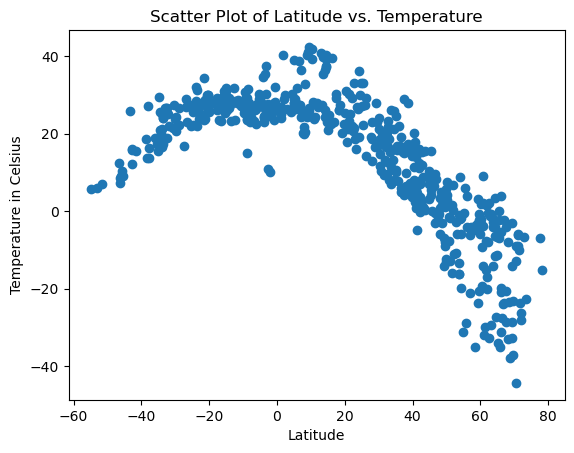

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Scatter Plot of Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature in Celsius")
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

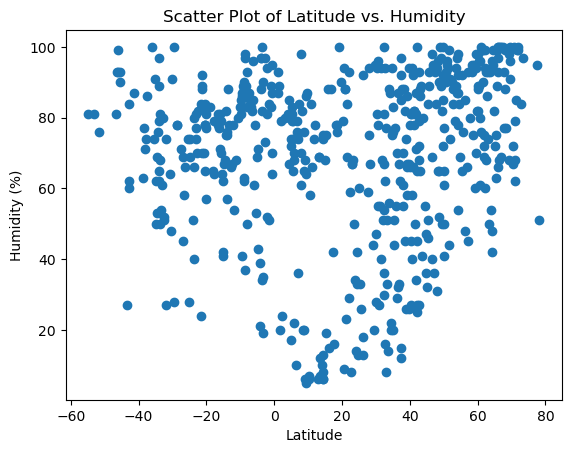

In [11]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("Scatter Plot of Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

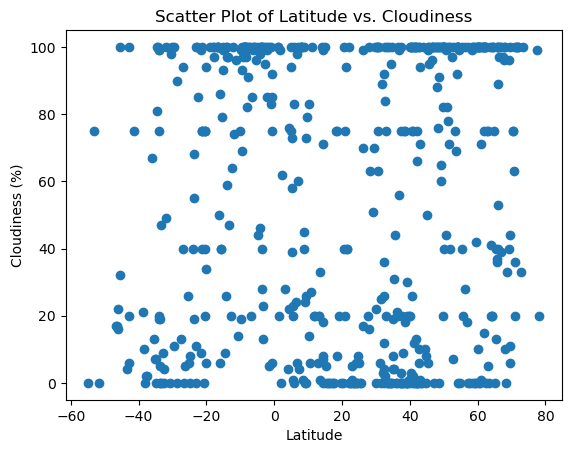

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("Scatter Plot of Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

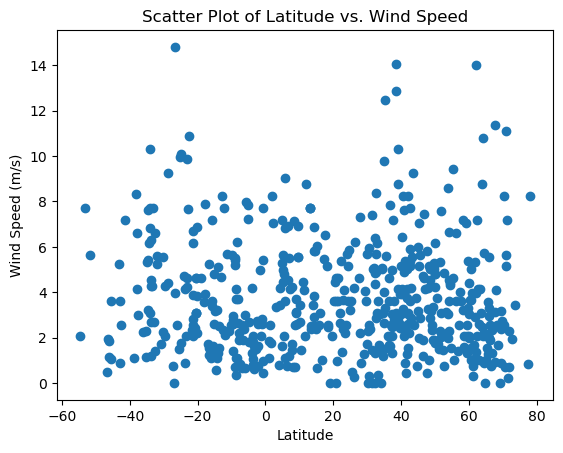

In [13]:
# Build scatter plot for latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Scatter Plot of Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE